# SIMPLE LINEAR REGRESSION

**Dependent variables:** data that can be controlled directly (other names: outcome variables, target variables, response variables)\
**Independent variables:** data that cannot be controlled directly (other names: predictor variables, input variables, explanatory variables, features)

## Assumptions

### 1. Linearity 
The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

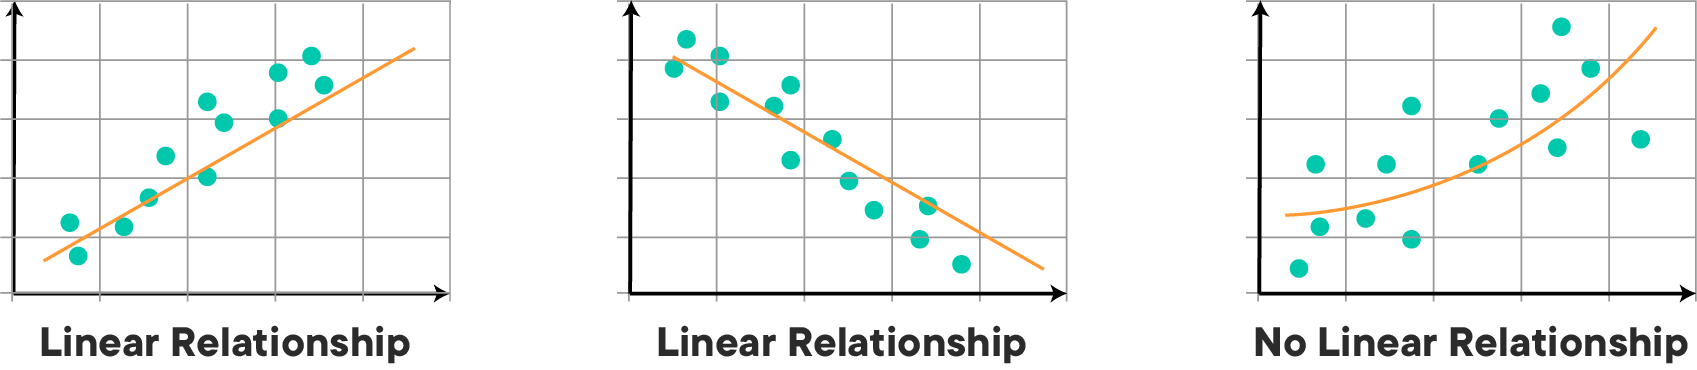

### 2. Normality
The normality assumption states that the model residuals should follow a normal distribution, The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.

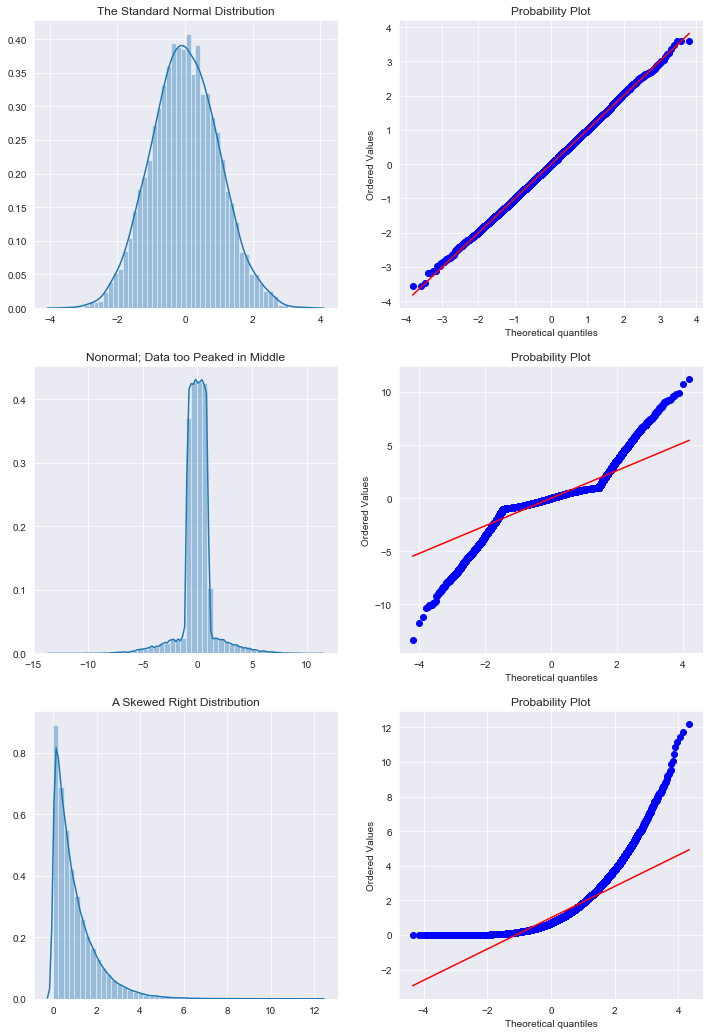

### 3. Homoscedasticity
Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

The inverse of heteroscedasticity is homoscedasticity, which indicates that a dependent variable's variability is equal across values of the independent variable. Homoscedasticity is the third assumption necessary when creating a linear regression model.

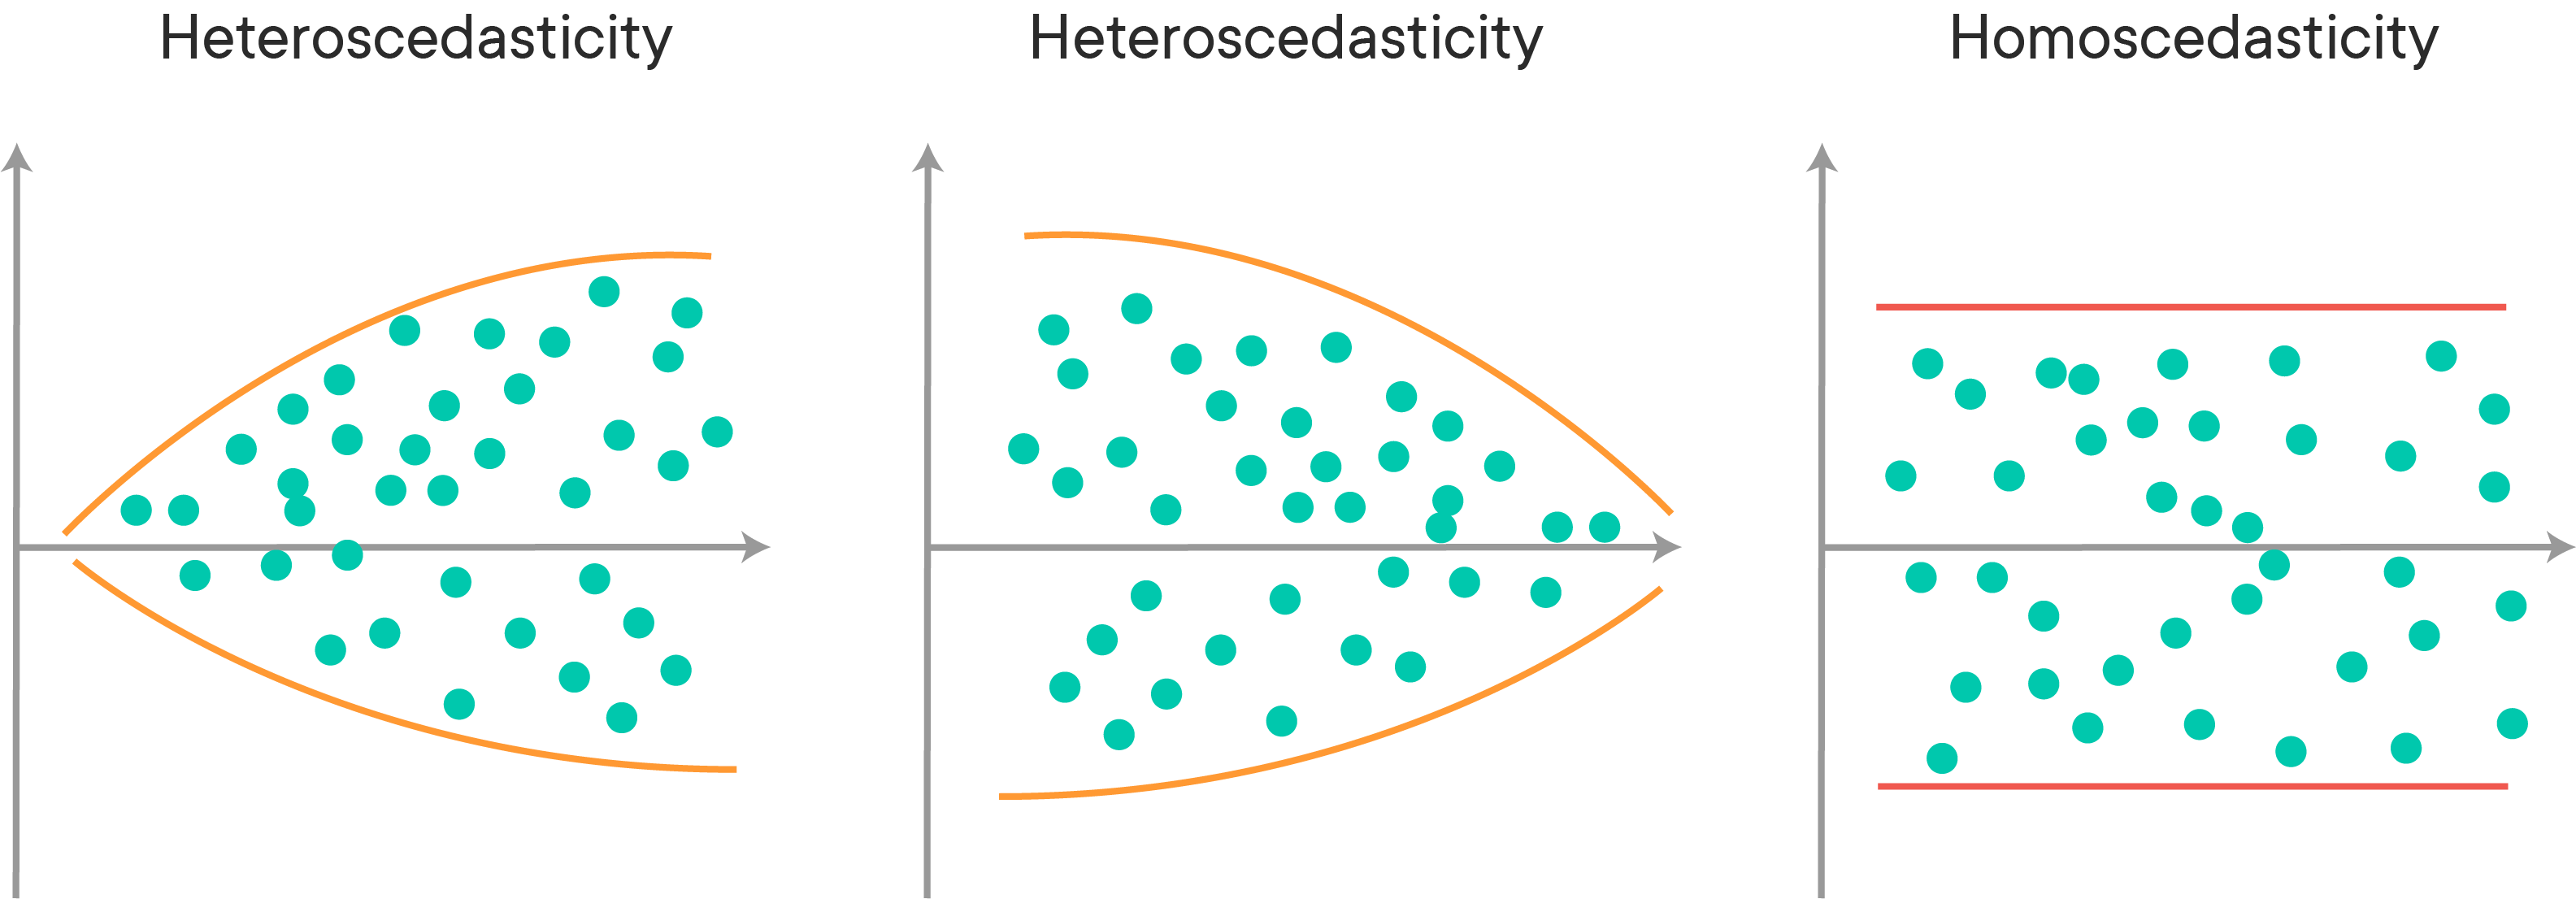

The **Jarque-Bera** test can be used to test for normality - especially when the number of data points is large

The **Goldfeld-Quant test** can be used to check for homoscedasticity

An **overfit** model is not generalizable and will not hold to future cases. An **underfit** model does not make full use of the information available and produces weaker predictions than is feasible. The following image gives a nice, more general demonstration:

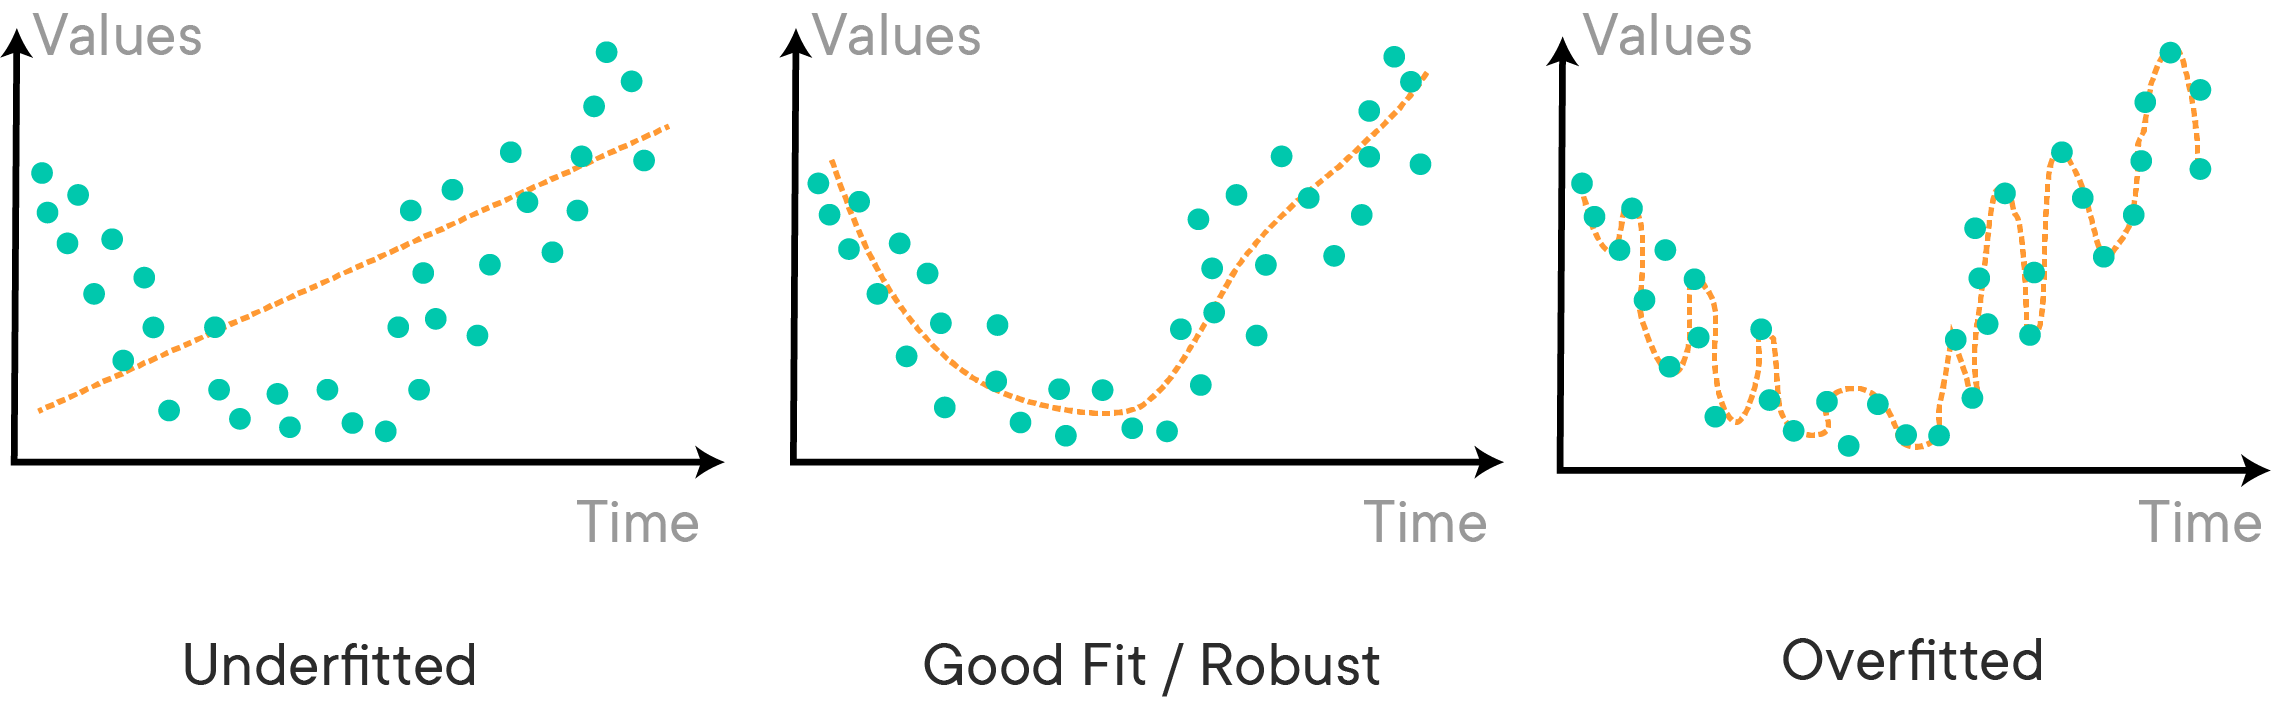

# Ames Housing Data Regression

In [ ]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

In [ ]:
#Perform a Train-Test Split
from sklearn.model_selection import train_test_split
X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Preparing Data For Modelling
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

In [ ]:
# Fitting linear regression on training data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
# fit the model to train data
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
# generate predictions for test & train sets
y_pred = linreg.predict(X_test)
y_pred2 = linreg.predict(X_train)

In [ ]:
# Calculate training and test MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.\

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [ ]:
# Your code here
import matplotlib.pyplot as plt

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    # Create new split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=42)

    # Fit transformers on new train and test
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform training data
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform test data
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)

    # Fit model
    linreg.fit(X_train, y_train)

    # Append metrics to their respective lists
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mses.append(mean_squared_error(y_train, y_hat_train))
    test_mses.append(mean_squared_error(y_test, y_hat_test))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Training Error')
ax.scatter(t_sizes, test_mses, label='Testing Error')
ax.legend();

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [ ]:
# Your code here
train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    inner_train_mses = []
    inner_test_mses = []
    for i in range(10):
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=i)
        
        # Skipping fitting the transformers; data quality issues cause too many OHE problems when
        # fitting this number of different models, but if you don't use drop='first' the
        # multicollinearity issues get pretty bad

        # Transform training data
        X_train = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)

        # Transform test data
        X_test = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)

        # Fit model
        linreg.fit(X_train, y_train)

        # Append metrics to their respective lists
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        inner_train_mses.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mses.append(mean_squared_error(y_test, y_hat_test))

    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Average Training Error')
ax.scatter(t_sizes, test_mses, label='Average Testing Error')
ax.legend();

## Key Takeaways
This section gave you the chance to learn about techniques whereby you can model non-linear relationships between the predictor and target variables. It's very rare that real-world problems can be modeled with a simple linear regression, so it's important to get yourself well acquainted with creating new features and selecting the most important ones.

An **interaction** is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable

**Polynomial regression** allows for bringing in higher orders of predictor variables (such as squared, cubed, etc)

The risk of polynomial regression is that they can easily overfit to data, so it's important to consider the Bias-variance tradeoff when building models with greater complexity

# To further summarize:
- The most common Data Science frameworks are CRISP-DM, KDD, and OSEMiN.
- The process of finding, filtering, and loading the appropriate data to answer a question is non-trivial.
- Decisions made in the data munging/scrubbing phase can have a huge impact on the accuracy of your predictions.
- Visualization is a key phase in EDA.

# Analyzing regression models:
- Check p-values to determine whether features are significant
- Use Q-Q plots to check for normality
- Plot residuals against the target variable to check for homoscedasticity (and rule out heteroscedasticity)
- Use the Variance Inflation Factor to assess Multicollinearity among independent variables